# Genomic imprinting and age at maturity

## Variable definitions

In [138]:
# show matplotlib plots inline
%matplotlib inline
from sympy import *
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

# improve display of formulas
init_printing(use_latex='mathjax')

In [139]:
1/2

0.5

In [140]:
# define symbols for sympy
tff, tfm, tmf, tmm = symbols('tff tfm tmf tmm')
afi, afji, afff, affm, afjff, afjfm, af = symbols('afi afji afff affm afjff afjfm af')
ami, amji, ammm, ammf, amjmf, amjmm, am = symbols('ami amji ammm ammf amjmf amjmm am')
df, dm, f, s, nf, nm, vf, vm, cf, cm, um, uf, i, k, q, a = symbols('df dm f s nf nm vf vm cf cm um uf i k q a')

In [141]:
# some substitution lists
## transmission coefficients in diploids
tij_diploid = [(tff,1/2),(tfm,1/2),(tmf,1/2),(tmm,1/2)]
tij_haplodiploid = [(tff,1/2),(tfm,1/2),(tmf,1),(tmm,0)]
af_vals = [(afi,af),(afji,af),(afff,af),(affm,af),(afjff,af),(afjfm,af)]
am_vals = [(ami,am),(amji,am),(ammm,am),(amjmf,am),(amjmm,am)]

## Mutant transition probabilities for $a_{\mathrm{f}}$

In [142]:
# expected number of daughters produced by female bearing mutant af allele
wff = 1/2 * tff * f(afi) * (
    (1-df) * s(afji) / (f(afff) * (1-df) * s(afjff) + f(af) * df * s(af))
    +
    df * s(afji) / (f(af) * s(af))
)

In [143]:
# expected number of sons produced by female bearing mutant af allele
wmf = 1/2 * tmf * f(afi) * (
    nm * (1-dm) / (nf * (f(afff) * (1-dm) + f(af) * dm))
    +
    nm * dm / (nf * f(af))
)

In [144]:
# expected number of daughters produced by male bearing mutant af allele
wfm = 1/2 * tfm * nf / nm * f(affm) * (
    (1-df) * s(afji) / (f(affm) * (1-df) * s(afjfm) + f(af) * df * s(af))
    +
    df * s(afji)  / (f(af) * s(af))
)

In [145]:
# expected number of sons produced by male bearing the mutant af allele
wmm = 1/2 * tmm * nf / nm * f(affm) * (
    nm * (1-dm) / (nf * (f(affm) * (1-dm) + f(af) * dm))
    +
    nm * dm / (nf * f(af))
)

# Mutant transition probabilities for $a_{\mathrm{m}}$

In [146]:
wam_ff = 1/2 * tff
wam_mf = 1/2 * tmf * (
    nm * (1-dm) * s(amji) / (nf * ((1-dm) * s(amjmf) + dm * s(am)))
    +
    nm * dm * s(amji) / (nf * s(am))
    )
wam_fm = 1/2 * tfm * nf / nm * f(ami) / f(ammm)
wam_mm = 1/2 * tmm * nf / nm * f(ami) / f(ammm) * (
    nm * (1-dm) * s(amji) / (nf * ((1-dm) * s(amjmm) + dm * s(am)))
    +
    nm * dm * s(amji) / (nf * s(am))
)

## Reproductive values and stable class frequencies

In [147]:
# mutant transition matrix
Amut = Matrix([[wff, wfm],[wmf, wmm]])

In [148]:
# resident transition matrix
A = Amut.subs(af_vals)
simplify(A)

⎡            0.5⋅nf⋅tfm⎤
⎢ 0.5⋅tff    ──────────⎥
⎢                nm    ⎥
⎢                      ⎥
⎢0.5⋅nm⋅tmf            ⎥
⎢──────────   0.5⋅tmm  ⎥
⎣    nf                ⎦

Calculate eigenvalues

In [149]:
Aevals = A.eigenvals()

# get dominant eigenvalue, for some obscure reason this is 
# packed in a dictionary, so unpack it
ev = list(Aevals.keys())[0]
ev

               _____________________________________
              ╱    2                              2 
tff   tmm   ╲╱  tff  - 2⋅tff⋅tmm + 4⋅tfm⋅tmf + tmm  
─── + ─── + ────────────────────────────────────────
 4     4                       4                    

### Reproductive values and class frequencies: diplodiploids

Calculate dominant right eigenvector

In [150]:
Matrix((1/ev * A)).subs(tij_diploid).applyfunc(simplify)

⎡        0.5⋅nf⎤
⎢ 0.5    ──────⎥
⎢          nm  ⎥
⎢              ⎥
⎢0.5⋅nm        ⎥
⎢──────   0.5  ⎥
⎣  nf          ⎦

In [151]:
rvec_diploid = Matrix((1/ev * A).subs(tij_diploid).eigenvects()[1][2])
rvec_diploid = (rvec_diploid / sum(rvec_diploid[p,0] for p in range(0,2))).applyfunc(simplify)
u_diploid = [(uf,rvec_diploid[0,0]),(um,rvec_diploid[1,0])]
u_diploid

⎡⎛     1.0⋅nf⎞  ⎛     1.0⋅nm⎞⎤
⎢⎜uf, ───────⎟, ⎜um, ───────⎟⎥
⎣⎝    nf + nm⎠  ⎝    nf + nm⎠⎦

Calculate dominant left eigenvector

In [152]:
lvec_diploid = Matrix(((1/ev) * A.T).subs(tij_diploid).eigenvects()[1][2]).T
lvec_diploid = (lvec_diploid / simplify(lvec_diploid * rvec_diploid)[0,0]).applyfunc(simplify).applyfunc(together)
v_diploid = [(vf,lvec_diploid[0,0]),(vm,lvec_diploid[0,1])]
v_diploid

⎡⎛    0.5⋅(nf + nm)⎞  ⎛    0.5⋅(nf + nm)⎞⎤
⎢⎜vf, ─────────────⎟, ⎜vm, ─────────────⎟⎥
⎣⎝          nf     ⎠  ⎝          nm     ⎠⎦

Class reproductive values

In [153]:
c_diploid = [(cf,vf * uf),(cm, vm * um)]
c_diploid = [(i[0], i[1].subs(v_diploid + u_diploid)) for i in c_diploid]
c_diploid

[(cf, 0.5), (cm, 0.5)]

### Reproductive values and class frequencies: haplodiploids

In [154]:
rvec_haplodiploid = Matrix((1/ev * A).subs(tij_haplodiploid).eigenvects()[1][2])
rvec_haplodiploid = (rvec_haplodiploid / sum(rvec_haplodiploid[p,0] for p in range(0,2))).applyfunc(simplify)
u_haplodiploid = [(uf, rvec_haplodiploid[0,0]),(um,rvec_haplodiploid[1,0])]
u_haplodiploid

⎡⎛     1.0⋅nf⎞  ⎛     1.0⋅nm⎞⎤
⎢⎜uf, ───────⎟, ⎜um, ───────⎟⎥
⎣⎝    nf + nm⎠  ⎝    nf + nm⎠⎦

In [155]:
lvec_haplodiploid = Matrix((1/ev * A.T).subs(tij_haplodiploid).eigenvects()[1][2]).T
lvec_haplodiploid = (lvec_haplodiploid / simplify(lvec_haplodiploid * 
                                                  rvec_haplodiploid)[0,0]).applyfunc(simplify).applyfunc(together)
v_haplodiploid = [(vf,lvec_haplodiploid[0,0]),(vm,lvec_haplodiploid[0,1])]
v_haplodiploid

⎡⎛    0.666666666666667⋅(nf + nm)⎞  ⎛    0.333333333333333⋅(nf + nm)⎞⎤
⎢⎜vf, ───────────────────────────⎟, ⎜vm, ───────────────────────────⎟⎥
⎣⎝                 nf            ⎠  ⎝                 nm            ⎠⎦

In [156]:
c_haplodiploid = [(cf,vf * uf),(cm, vm * um)]
c_haplodiploid = [(i[0], i[1].subs(v_haplodiploid + u_haplodiploid)) for i in c_haplodiploid]
c_haplodiploid

[(cf, 0.666666666666667), (cm, 0.333333333333333)]

## Relatedness coefficients

### Diplodiploidy

Juvenile coefficients of consanguinity, $Q_{ij}^{\mathrm{J}}$

In [157]:
Qff, Qmm, Qmf, Qfm, Qf, Qm = symbols('Qff Qmm Qmf Qfm Qf Qm')
QffJ, QmmJ, QmfJ, QfmJ = symbols('QffJ QmmJ QmfJ QfmJ')
hf, hm = symbols('hf hm')
hf = 1-df
hm = 1-dm
Qsjuv = [Eq(QffJ, 1/4 * (1/nf * Qf + (nf-1)/nf * Qff) + 1/2 * Qmf + 1/4 * (1/nm * Qm + (nm-1)/nm * Qmm)),
         Eq(QmmJ, QffJ),
         Eq(QfmJ, QffJ),
         Eq(QmfJ, QffJ)
        ]

Adult coefficients of consanguinity, $Q_{ij}$

In [158]:
Qad = [Eq(Qf, 1/2 * (1 + Qfm)),
       Eq(Qm, Qf),
    Eq(Qff, hf**2 * QffJ),
      Eq(Qmm, hm**2 * QmmJ),
      Eq(Qfm, hf * hm * QfmJ),
      Eq(Qmf, Qfm) 
      ]

In [159]:
Qsols_diploid=solve(Qsjuv+Qad,[QffJ, QmmJ, QfmJ, QmfJ, Qf, Qm, Qff, Qmm, Qfm, Qmf],dict=True)
Qsols_diploid = [(key,val) for key, val in Qsols_diploid[0].items()]

Relatedness coefficients - offspring expression of age at maturity

In [160]:
# first define all necessary symbols
Rim, Rif = symbols('Rim Rif')
RfownJf, RfownJm, RmownJf, RmownJm = symbols('RfownJf RfownJm RmownJf RmownJm')
RflocJf, RflocJm, RmlocJf, RmlocJm = symbols('RflocJf RflocJm RmlocJf RmlocJm')
Rff, Rfm, Rmf, Rmm = symbols('Rff Rfm Rmf Rmm')

In [161]:
Rij_diploid = [(Rim, Qm),(Rif, Qf),
       (RfownJf, Qf),(RfownJm, Qm),(RmownJf, Qf),(RmownJm, Qm),
        (RflocJf, 1/2 * (1/nf * Qf + (nf-1)/nf * Qff) +  1/2 * Qfm),
       (RflocJm, 1/2 * (1/nf * Qf + (nf-1)/nf * Qff) +  1/2 * Qfm),
       (RmlocJf, 1/2 * (1/nm * Qm + (nm-1)/nm * Qmm) + 1/2 * Qfm),
       (RmlocJm, 1/2 * (1/nm * Qm + (nm-1)/nm * Qmm) + 1/2 * Qfm),
       (Rff, Qff),
       (Rfm, Qfm),
       (Rmf, Qmf),
       (Rmm, Qmm)
      ]


Relatedness coefficients - maternal expression

In [162]:
RijM_diploid = [(Rim,  1/2 * (Qf+Qfm)),
                (Rif,  1/2 * (Qf+Qfm)),
       (RfownJf,  1/2 * (Qf+Qfm)),
        (RfownJm,  1/2 * (Qf+Qfm)),
        (RmownJf, Qfm),
        (RmownJm, Qfm),
        (Rff, 1/2 * (1/nf * Qf + (nf-1)/nf * Qff) +  1/2 * Qfm),
       (Rfm, 1/2 * (1/nf * Qf + (nf-1)/nf * Qff) +  1/2 * Qfm),
       (Rmf, 1/2 * (1/nf * Qf + (nf-1)/nf * Qff) +  1/2 * Qfm),
       (Rmm, 1/2 * (1/nf * Qf + (nf-1)/nf * Qff) +  1/2 * Qfm),
       (RflocJf, Qff),
       (RflocJm, Qff),
       (RmlocJf, Qmf),
       (RmlocJm, Qmf)
      ]

In [163]:
RijP_diploid = [(Rim,  1/2 * (Qm+Qfm)),
                (Rif,  1/2 * (Qm+Qfm)),
       (RfownJf,  Qfm),
        (RfownJm,  Qfm),
        (RmownJf, Qm),
        (RmownJm, Qmm),
        (Rff, 1/2 * (1/nm * Qf + (nm-1)/nm * Qmm) +  1/2 * Qfm),
       (Rfm, 1/2 * (1/nm * Qf + (nm-1)/nm * Qmm) +  1/2 * Qfm),
       (Rmf, 1/2 * (1/nm * Qf + (nm-1)/nm * Qmm) +  1/2 * Qfm),
       (Rmm, 1/2 * (1/nm * Qf + (nm-1)/nm * Qmm) +  1/2 * Qfm),
       (RflocJf, Qmf),
       (RflocJm, Qmf),
       (RmlocJf, Qmm),
       (RmlocJm, Qmm)
      ]

Relatedness coefficients - expression by maternally inherited alleles

In [164]:
RijMI_diploid = [(Rim, Qm), 
                 (Rif, Qf),
        (RfownJf, 1), 
                 (RfownJm, 1), 
                 (RmownJf, Qfm), 
                 (RmownJm, Qfm),
         (RflocJf, 1/nf * Qf + (nf-1)/nf * Qff),
                 (RflocJm, 1/nf * Qf + (nf-1)/nf * Qff),
                 (RmlocJf, Qfm),
                 (RmlocJm, Qfm),
                 (Rff, 1/2 * (1/nf * Qf + (nf-1)/nf * Qff) + 1/2 * Qfm),
                 (Rfm, 1/2 * (1/nf * Qf + (nf-1)/nf * Qff) + 1/2 * Qfm),
                 (Rmf, 1/2 * (1/nf * Qf + (nf-1)/nf * Qff) + 1/2 * Qfm),
                 (Rmm, 1/2 * (1/nf * Qf + (nf-1)/nf * Qff) + 1/2 * Qfm)
        ]

Relatedness coefficients - expression by paternally inherited alleles

In [165]:
RijPI_diploid = [(Rim, Qm),(Rif, Qf),
                (RfownJf, Qfm),
                (RfownJm, Qfm),
                (RmownJf, 1),
                (RmownJm, 1),
                (RflocJf, Qfm),
                (RflocJm, Qfm),
                (RmlocJf, 1/nm * Qm + (nm-1)/nm * Qmm),
                (RmlocJm, 1/nm * Qm + (nm-1)/nm * Qmm),
                (Rff, 1/2 * (1/nm * Qm + (nm-1)/nm * Qmm) + 1/2 * Qfm),
                (Rfm, 1/2 * (1/nm * Qm + (nm-1)/nm * Qmm) + 1/2 * Qfm),
                 (Rmf, 1/2 * (1/nm * Qm + (nm-1)/nm * Qmm) + 1/2 * Qfm),
                 (Rmm, 1/2 * (1/nm * Qm + (nm-1)/nm * Qmm) + 1/2 * Qfm)
                ]

## Relatedness and consanguinity - haplodiploidy

In [166]:

Qsjuv_haplo = [Eq(QffJ, 1/4 * (1/nf * Qf + (nf-1)/nf * Qff) + 1/2 * Qmf + 1/4 * (1/nm * Qm + (nm-1)/nm * Qmm)),
         Eq(QmmJ, 1/nf * Qf + (nf-1)/nf * Qff),
         Eq(QfmJ, 1/2 * (1/nf * Qf + (nf-1)/nf * Qff) + 1/2 * Qfm),
         Eq(QmfJ, QfmJ)
        ]
            
Qad_haplo = [Eq(Qf, 1/2 * (1 + Qfm)),
       Eq(Qm, 1),
    Eq(Qff, hf**2 * QffJ),
      Eq(Qmm, hm**2 * QmmJ),
      Eq(Qfm, hf * hm * QfmJ),
      Eq(Qmf, Qfm) 
      ]
Qsols_haplodiploid=solve(Qsjuv_haplo+Qad_haplo,[QffJ, QmmJ, QfmJ, QmfJ, Qf, Qm, Qff, Qmm, Qfm, Qmf],dict=True)
Qsols_haplodiploid = [(key,val) for key, val in Qsols_haplodiploid[0].items()]

In [167]:
Rij_haplodiploid = [
    (Rim, Qm),
    (Rif, Qf),
    (RfownJf, Qf),
    (RfownJm, Qm),
    (RmownJf, Qf),
    (RmownJm, Qmf),
    (RflocJf, 1/2 * (1/nf * Qf + (nf-1)/nf * Qff) +  1/2 * Qfm),
    (RflocJm, 1/nf * Qf + (nf-1)/nf * Qff),
    (RmlocJf, 1/2 * (1/nm * Qm + (nm-1)/nm * Qmm) + 1/2 * Qfm),
    (RmlocJm, Qfm),
    (Rff, Qff),
    (Rfm, Qfm),
    (Rmf, Qmf),
    (Rmm, Qmm)
      ]

In [168]:
RijMI_haplodiploid = [
    (Rim, Qm),
    (Rif, Qf),
    (RfownJf, 1),
    (RfownJm, 1),
    (RmownJf, Qfm),
    (RmownJm, Qfm),
    (RflocJf, 1/nf * Qf + (nf-1)/nf * Qff),
    (RflocJm, 1/nf * Qf + (nf-1)/nf * Qff),
    (RmlocJf, Qfm),
    (RmlocJm, Qfm),
    (Rff, 1/2 * (1/nf * Qf + (nf-1)/nf * Qff) + 1/2 * Qfm),
    (Rfm, 1/2 * (1/nf * Qf + (nf-1)/nf * Qff) + 1/2 * Qfm),
    (Rmf, 1/nf * Qf + (nf-1)/nf * Qff),
    (Rmm, 1/nf * Qf + (nf-1)/nf * Qff)
      ]

In [169]:
RijPI_haplodiploid = [
    (Rim, Qm),
    (Rif, Qf),
    (RfownJf, Qfm),
    (RfownJm, Qm),
    (RmownJf, 1),
    (RmownJm, Qfm),
    (RflocJf, Qfm),
    (RflocJm, 1/nf * Qf + (nf-1)/nf * Qff),
    (RmlocJf, 1/nm * Qm + (nm-1)/nm * Qmm),
    (RmlocJm, Qfm),
    (Rff, 1/2 * (1/nm * Qm + (nm-1)/nm * Qmm) + 1/2 * Qfm),
    (Rfm, Qfm),
    (Rmf, Qmf),
    (Rmm, Qmm)
      ]

# Selection gradients

In [170]:
wf = wff + vm / vf * wmf
wm = wmm + vf / vm * wfm

In [171]:
func_sub = [(f(af),(k * af)**3),(s(af),exp(-q * af)),(f(am),(k * am)**3),(s(am),exp(-q * am))]

Selection gradient on $a_{\mathrm{f}}$

In [172]:
dwdaf = cf * (diff(wf,afi) * Rif 
              + diff(wf,afji) * RfownJf 
              + diff(wf, afff) * Rff 
              + diff(wf, afjff) * RflocJf
              ) + cm * (
            diff(wm,afji) * RmownJf
            + diff(wm,affm) * Rmf
            + diff(wm, afjfm) * RmlocJf
            )
# substitute for relatedness coefficients, reproductive values, transmission coefficients
# and functions
dwdaf_diploid = dwdaf.subs(Rij_diploid).subs(Qsols_diploid).subs(
    c_diploid + v_diploid + u_diploid).subs(tij_diploid + af_vals).subs(func_sub).doit()
dwdafMI_diploid = dwdaf.subs(RijMI_diploid).subs(Qsols_diploid).subs(
    c_diploid + v_diploid + u_diploid).subs(tij_diploid + af_vals).subs(func_sub).doit()
dwdafPI_diploid = dwdaf.subs(RijPI_diploid).subs(Qsols_diploid).subs(
    c_diploid + v_diploid + u_diploid).subs(tij_diploid + af_vals).subs(func_sub).doit()
dwdafM_diploid = dwdaf.subs(RijM_diploid).subs(Qsols_diploid).subs(
    c_diploid + v_diploid + u_diploid).subs(tij_diploid + af_vals).subs(func_sub).doit()
dwdafP_diploid = dwdaf.subs(RijP_diploid).subs(Qsols_diploid).subs(
    c_diploid + v_diploid + u_diploid).subs(tij_diploid + af_vals).subs(func_sub).doit()


dwdaf_haplodiploid = dwdaf.subs(Rij_haplodiploid).subs(Qsols_haplodiploid).subs(
    c_haplodiploid + v_haplodiploid + u_haplodiploid).subs(tij_haplodiploid + af_vals).subs(func_sub).doit()
dwdafMI_haplodiploid = dwdaf.subs(RijMI_haplodiploid).subs(Qsols_haplodiploid).subs(
    c_haplodiploid + v_haplodiploid + u_haplodiploid).subs(tij_haplodiploid + af_vals).subs(func_sub).doit()
dwdafPI_haplodiploid = dwdaf.subs(RijPI_haplodiploid).subs(Qsols_haplodiploid).subs(
    c_haplodiploid + v_haplodiploid + u_haplodiploid).subs(tij_haplodiploid + af_vals).subs(func_sub).doit()
#dwdafM_haplodiploid = dwdaf.subs(RijM_haplodiploid).subs(Qsols_haplodiploid).subs(
#    c_haplodiploid + v_haplodiploid + u_haplodiploid).subs(tij_haplodiploid + af_vals).subs(func_sub).doit()


Selection gradient on $a_{\mathrm{m}}$

In [173]:
wam_f = wam_ff + vm / vf * wam_mf
wam_m = wam_mm + vf / vm * wam_fm

In [174]:
dwdam = cf * (diff(wam_f,amji) * RfownJm
            + diff(wam_f,amjmf) * RflocJm
            ) + cm * (
        diff(wam_m,ami) * Rim
            + diff(wam_m,amji) * RmownJm
            + diff(wam_m,ammm) * Rmm
            + diff(wam_m,amjmm) * RmlocJm
        )
# substitute for relatedness coefficients, reproductive values, transmission coefficients
# and functions
dwdam_diploid = dwdam.subs(Rij_diploid).subs(Qsols_diploid).subs(
    c_diploid + v_diploid + u_diploid).subs(tij_diploid + am_vals).subs(func_sub).doit()
dwdamMI_diploid = dwdam.subs(RijMI_diploid).subs(Qsols_diploid).subs(
    c_diploid + v_diploid + u_diploid).subs(tij_diploid + am_vals).subs(func_sub).doit()
dwdamPI_diploid = dwdam.subs(RijPI_diploid).subs(Qsols_diploid).subs(
    c_diploid + v_diploid + u_diploid).subs(tij_diploid + am_vals).subs(func_sub).doit()
dwdamM_diploid = dwdam.subs(RijM_diploid).subs(Qsols_diploid).subs(
    c_diploid + v_diploid + u_diploid).subs(tij_diploid + am_vals).subs(func_sub).doit()

dwdam_haplodiploid = dwdam.subs(Rij_haplodiploid).subs(Qsols_haplodiploid).subs(
    c_haplodiploid + v_haplodiploid + u_haplodiploid).subs(tij_haplodiploid + am_vals).subs(func_sub).doit()
dwdamMI_haplodiploid = dwdam.subs(RijMI_haplodiploid).subs(Qsols_haplodiploid).subs(
    c_haplodiploid + v_haplodiploid + u_haplodiploid).subs(tij_haplodiploid + am_vals).subs(func_sub).doit()
dwdamPI_haplodiploid = dwdam.subs(RijPI_haplodiploid).subs(Qsols_haplodiploid).subs(
    c_haplodiploid + v_haplodiploid + u_haplodiploid).subs(tij_haplodiploid + am_vals).subs(func_sub).doit()
#dwdamM_haplodiploid = dwdam.subs(RijM_haplodiploid).subs(Qsols_haplodiploid).subs(
#    c_haplodiploid + v_haplodiploid + u_haplodiploid).subs(tij_haplodiploid + am_vals).subs(func_sub).doit()


## Numerical evaluation of evolutionarily singular strategies

In [175]:
def ans(dfs=0.5, 
        dms=0.5,
        nms=2,
        nfs=2,
        ks=1/3,
        qs=1,
        ainit=1.5,
        grad_af=dwdaf_diploid,
        grad_am=dwdam_diploid
       ):
    subs_list = [(df,dfs),(dm,dms),(nm,nms),(nf,nfs),(k,ks),(q,qs)]
    solval = nsolve(
        (Eq(grad_af.subs(subs_list),0),Eq(grad_am.subs(subs_list),0)),
        (af,am),(ainit,ainit)
    )
    return(list(solval))

In [176]:
dmvals = list(np.arange(0,1.05,0.05))

# transpose the list so that af* is the first entry
# and am* the second one
def transpose(the_list):
    return(list(map(list,zip(*the_list))))

# calculate singular strategies; diplodiploidy
yvals = transpose([ ans(dms=dmi,nms=2,nfs=2,dfs=1.0) for dmi in dmvals ])
yvalsMI = transpose(
    [ ans(
            dms=dmi,nms=2,nfs=2,dfs=1.0,grad_af=dwdafMI_diploid,grad_am=dwdamMI_diploid
        ) for dmi in dmvals ])
yvalsPI = transpose(
    [ ans(
            dms=dmi,nms=2,nfs=2,dfs=1.0,grad_af=dwdafPI_diploid,grad_am=dwdamPI_diploid
        ) for dmi in dmvals ])
yvalsM = transpose([ 
        ans(
            dms=dmi,nms=2,nfs=2,dfs=1.0,grad_af=dwdafM_diploid,grad_am=dwdamM_diploid
        ) for dmi in dmvals ])
yvalsM = transpose([ 
        ans(
            dms=dmi,nms=2,nfs=2,dfs=1.0,grad_af=dwdafM_diploid,grad_am=dwdamM_diploid
        ) for dmi in dmvals ])

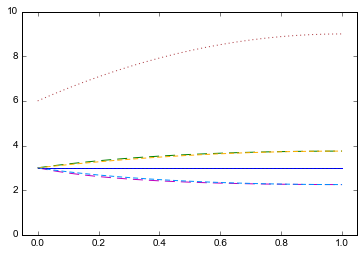

In [177]:
plt.ylim((0,10))
plt.xlim((-0.05,1.05))
plt.plot(dmvals,yvals[0],'r',dmvals,yvals[1],'b',)
plt.plot(dmvals,yvalsPI[0],'g',dmvals,yvalsPI[1],'m',linestyle=(0,(10,6)))
plt.plot(dmvals,yvalsMI[0],'#ffae00',dmvals,yvalsMI[1],'#0090ff',linestyle=(0,(5,3)))
plt.plot(dmvals,yvalsM[0],'#AA353C',dmvals,yvalsM[1],'#00178C',linestyle=(0,(1,3)))

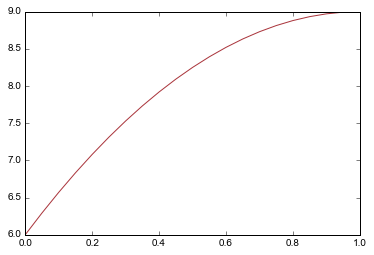

In [178]:
plt.plot(dmvals,yvalsM[0],'#AA353C')#,dmvals,yvalsM[1],'#00178C',linestyle=(0,(1,3)))

In [179]:
yvals = None
yvalsPI = None
yvalsMI = None

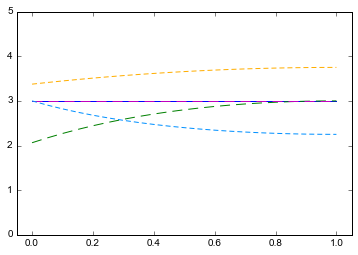

In [180]:

# calculate singular strategies for haplodiploidy
yvals_haplo = [ ans(
        dms=dmi,nms=2,nfs=2,dfs=1.0,grad_af=dwdaf_haplodiploid,grad_am=dwdam_haplodiploid
    ) for dmi in dmvals ]
yvalsMI_haplo = [ ans(
        dms=dmi,nms=2,nfs=2,dfs=1.0,grad_af=dwdafMI_haplodiploid,grad_am=dwdamMI_haplodiploid
    ) for dmi in dmvals ]
yvalsPI_haplo = [  ans(
        dms=dmi,nms=2,nfs=2,dfs=1.0,grad_af=dwdafPI_haplodiploid,grad_am=dwdamPI_haplodiploid
    )  for dmi in dmvals ]


# transpose the list so that af* is the first entry
# and am* the second one
yvals_haplo = list(map(list,zip(*yvals_haplo)))
yvalsMI_haplo = list(map(list,zip(*yvalsMI_haplo)))
yvalsPI_haplo = list(map(list,zip(*yvalsPI_haplo)))

plt.ylim((0,5))
plt.xlim((-0.05,1.05))
plt.plot(dmvals,yvals_haplo[0],'r',dmvals,yvals_haplo[1],'b',)
plt.plot(dmvals,yvalsPI_haplo[0],'g',dmvals,yvalsPI_haplo[1],'m',linestyle=(0,(10,6)))
plt.plot(dmvals,yvalsMI_haplo[0],'#ffae00',dmvals,yvalsMI_haplo[1],'#0090ff',linestyle=(0,(5,3)))

Plot age at maturity as $d_{\mathrm{m}} = 1-d_{\mathrm{f}}$

In [181]:
dmvals = list(np.arange(0,1.05,0.05))


# calculate singular strategies for offspring expression
yvals = transpose([ ans(
            dms=dmi,nms=2,nfs=2,dfs=1-dmi,grad_af=dwdaf_diploid,grad_am=dwdam_diploid
        ) for dmi in dmvals ])
yvalsMI = transpose([ ans(
            dms=dmi,nms=2,nfs=2,dfs=1-dmi,grad_af=dwdafMI_diploid,grad_am=dwdamMI_diploid
        ) for dmi in dmvals ])
yvalsPI = transpose([ ans(
            dms=dmi,nms=2,nfs=2,dfs=1-dmi,grad_af=dwdafPI_diploid,grad_am=dwdamPI_diploid
        ) for dmi in dmvals ])
yvals_haplo = transpose([ ans(
            dms=dmi,nms=2,nfs=2,dfs=1-dmi,grad_af=dwdaf_haplodiploid,grad_am=dwdam_haplodiploid
        ) for dmi in dmvals ])
yvalsMI_haplo = transpose([ ans(
            dms=dmi,nms=2,nfs=2,dfs=1-dmi,grad_af=dwdafMI_haplodiploid,grad_am=dwdamMI_haplodiploid
        ) for dmi in dmvals ])
yvalsPI_haplo = transpose([ ans(
            dms=dmi,nms=2,nfs=2,dfs=1-dmi,grad_af=dwdafPI_haplodiploid,grad_am=dwdamPI_haplodiploid
        ) for dmi in dmvals ])

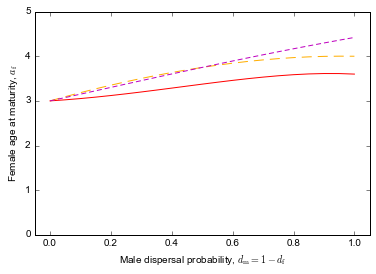

In [182]:
plt.ylim((0,5))
plt.xlim((-0.05,1.05))
plt.plot(dmvals, yvals[0],'r')
plt.plot(dmvals, yvalsPI[0],'#ffae00',linestyle=(0,(10,6)))#,linestyle=(0,10,6))
plt.plot(dmvals, yvalsMI[0],'m',linestyle=(0,(5,3)))#,linestyle=(0,10,6))
plt.ylabel(r'Female age at maturity, $a_{\mathrm{f}}$')
plt.xlabel(r'Male dispersal probability, $d_{\mathrm{m}}=1-d_{\mathrm{f}}$')

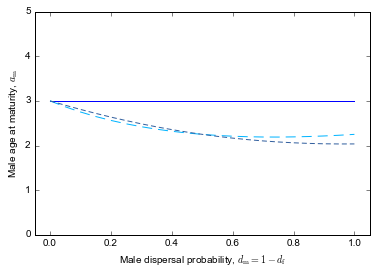

In [183]:
plt.ylim((0,5))
plt.xlim((-0.05,1.05))
plt.plot(dmvals, yvals[1],'b')
plt.plot(dmvals, yvalsPI[1],'#00b4ff',linestyle=(0,(10,6)))#,linestyle=(0,10,6))
plt.plot(dmvals, yvalsMI[1],'#33609f',linestyle=(0,(5,3)))#,linestyle=(0,10,6))
plt.ylabel(r'Male age at maturity, $a_{\mathrm{m}}$')
plt.xlabel(r'Male dispersal probability, $d_{\mathrm{m}}=1-d_{\mathrm{f}}$')

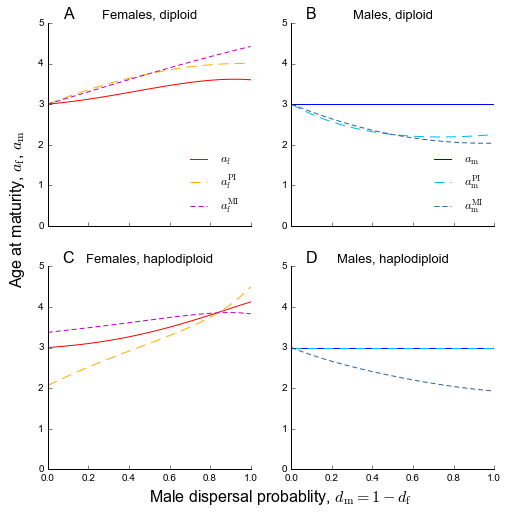

In [184]:
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
rcParams['font.weight'] = 'normal'
fontdict={'size':16}
fontdict_small={'size':13}

plt.figure(figsize=(8,8))
ylim_fem=(0,5)
ylim_men=(0,4)
xticks=[0,0.2,0.4,0.6,0.8,1.0]
ax1 = None
ax1 = plt.subplot(2,2,1)
ax1.set_ylim(ylim_fem)
ax1.set_yticks(list(np.arange(0,ylim_fem[1]+1,1)))
ax1.set_xticks(xticks)
ax1.plot(dmvals, yvals[0],'r')
ax1.plot(dmvals, yvalsPI[0],'#ffae00',linestyle=(0,(10,6)))#,linestyle=(0,10,6))
ax1.plot(dmvals, yvalsMI[0],'m',linestyle=(0,(5,3)))#,linestyle=(0,10,6))
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.set_xticklabels([])
plt.text(.5,ylim_fem[1]+.1,r'Females, diploid',fontdict=fontdict_small,horizontalalignment='center')
# indicator label
plt.text(.1,ylim_fem[1]+.1,r'A',fontdict=fontdict,horizontalalignment='center')

# add the legend
plt.legend((r'$a_{\mathrm{f}}$',
            r'$a_{\mathrm{f}}^{\mathrm{PI}}$',
            r'$a_{\mathrm{f}}^{\mathrm{MI}}$'),loc=4,frameon=False)
    
ax2 = plt.subplot(2,2,2)
ax2.set_ylim(ylim_men)
ax2.set_yticks(list(np.arange(0,ylim_fem[1]+1,1)))
ax2.plot(dmvals, yvals[1],'b')
ax2.plot(dmvals, yvalsPI[1],'#00b4ff',linestyle=(0,(10,6)))
ax2.plot(dmvals, yvalsMI[1],'#33609f',linestyle=(0,(5,3)))#,linestyle=(0,10,6))
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')
ax2.set_xticklabels([])
plt.text(.5,ylim_fem[1]+.1,r'Males, diploid',fontdict=fontdict_small,horizontalalignment='center')
# indicator label
plt.text(.1,ylim_fem[1]+.1,r'B',fontdict=fontdict,horizontalalignment='center')
# add the legend
plt.legend((r'$a_{\mathrm{m}}$',
            r'$a_{\mathrm{m}}^{\mathrm{PI}}$',
            r'$a_{\mathrm{m}}^{\mathrm{MI}}$'),loc=4,frameon=False)


ax3 = plt.subplot(2,2,3)
ax3.set_ylim(ylim_fem)
ax3.set_yticks(list(np.arange(0,ylim_fem[1]+1,1)))
ax3.plot(dmvals, yvals_haplo[0],'r')
ax3.plot(dmvals, yvalsPI_haplo[0],'#ffae00',linestyle=(0,(10,6)))#,linestyle=(0,10,6))
ax3.plot(dmvals, yvalsMI_haplo[0],'m',linestyle=(0,(5,3)))#,linestyle=(0,10,6))
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.yaxis.set_ticks_position('left')
ax3.xaxis.set_ticks_position('bottom')
plt.text(-.2,8,r'Age at maturity, $a_{\mathrm{f}}$, $a_{\mathrm{m}}$',fontdict=fontdict,rotation=90)
plt.text(.5,ylim_fem[1]+.1,r'Females, haplodiploid',fontdict=fontdict_small,horizontalalignment='center')
# indicator label
plt.text(.1,ylim_fem[1]+.1,r'C',fontdict=fontdict,horizontalalignment='center')



ax4 = plt.subplot(2,2,4)
ax4.set_ylim(ylim_men)
ax4.plot(dmvals, yvals_haplo[1],'b')
ax4.set_yticks(list(np.arange(0,ylim_fem[1]+1,1)))
ax4.plot(dmvals, yvalsPI_haplo[1],'#00b4ff',linestyle=(0,(10,6)))
ax4.plot(dmvals, yvalsMI_haplo[1],'#33609f',linestyle=(0,(5,3)))#,linestyle=(0,10,6))
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.yaxis.set_ticks_position('left')
ax4.xaxis.set_ticks_position('bottom')
plt.text(.5,ylim_fem[1]+.1,r'Males, haplodiploid',fontdict=fontdict_small,horizontalalignment='center')
# indicator label
plt.text(.1,ylim_fem[1]+.1,r'D',fontdict=fontdict,horizontalalignment='center')


# x-axis label

plt.text(-0.7,-.8,r'Male dispersal probability, $d_{\mathrm{m}} = 1-d_{\mathrm{f}}$',fontdict=fontdict)
plt.savefig("para",format="pdf")
plt.show()

## Compare with individual-based simulations

In [185]:
import pandas as pd
the_data = pd.read_csv("./figs/summary_age_vs_size_sims.csv",sep=";")

#  maternal and paternal age
the_data2 = pd.read_csv("./figs/summary_matpat_age_vs_size.csv",sep=";")

# select diploid cases
the_data_diploid = the_data[(the_data['system'] == 'diploid') 
                            & (the_data['nmp'] == 2)
                           & (the_data['nfp'] == 2)].sort('dm')
the_data_haplodiploid = the_data[(the_data['system'] == 'haplodiploid') 
                            & (the_data['nmp'] == 2)
                           & (the_data['nfp'] == 2)].sort('dm')

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [186]:
off_dip_numer[0]

[mpf('3.3970588235294081'),
 mpf('3.414460370994931'),
 mpf('3.4254310344827537'),
 mpf('3.4310072501294755'),
 mpf('3.4320359281437029'),
 mpf('3.4292168674698713'),
 mpf('3.4231343283581971'),
 mpf('3.4142808683853638'),
 mpf('3.4030755711775058'),
 mpf('3.3898781530568663'),
 mpf('3.3750000000000003'),
 mpf('3.3587128914192644'),
 mpf('3.3412559618441937'),
 mpf('3.3228413068844888'),
 mpf('3.3036585365853708'),
 mpf('3.2838785046728962'),
 mpf('3.2636563876651884'),
 mpf('3.2431342475640646'),
 mpf('3.2224431818181884'),
 mpf('3.201705141657913'),
 mpf('3.1810344827586144')]

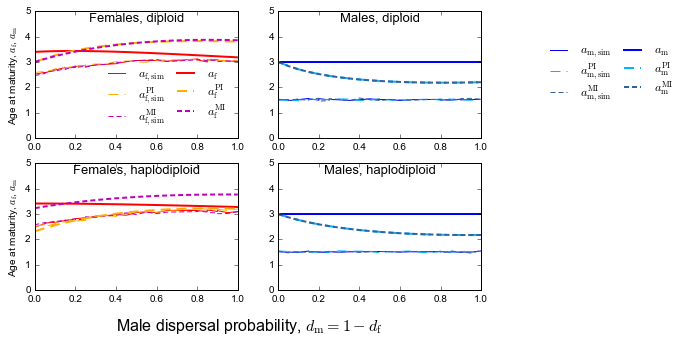

In [192]:
off_dip=the_data_diploid[the_data_diploid['imprint']=='offspring']
mi_dip=the_data_diploid[the_data_diploid['imprint']=='madumnal']
pi_dip=the_data_diploid[the_data_diploid['imprint']=='padumnal']

# haploid data
off_hap=the_data_haplodiploid[the_data_haplodiploid['imprint']=='offspring']
mi_hap=the_data_haplodiploid[the_data_haplodiploid['imprint']=='madumnal']
pi_hap=the_data_haplodiploid[the_data_haplodiploid['imprint']=='padumnal']

off_dip_numer=transpose([ ans(
            dms=dmi,nms=2,nfs=2,dfs=0.5,grad_af=dwdaf_diploid,grad_am=dwdam_diploid
        ) for dmi in dmvals ])
off_dip_numerMI=transpose([ ans(
            dms=dmi,nms=2,nfs=2,dfs=0.5,grad_af=dwdafMI_diploid,grad_am=dwdamMI_diploid
        ) for dmi in dmvals ])
off_dip_numerPI=transpose([ ans(
            dms=dmi,nms=2,nfs=2,dfs=0.5,grad_af=dwdafPI_diploid,grad_am=dwdamMI_diploid
        ) for dmi in dmvals ])


off_hap_numer=transpose([ ans(
            dms=dmi,nms=2,nfs=2,dfs=0.5,grad_af=dwdaf_haplodiploid,grad_am=dwdam_haplodiploid
        ) for dmi in dmvals ])
off_hap_numerMI=transpose([ ans(
            dms=dmi,nms=2,nfs=2,dfs=0.5,grad_af=dwdafMI_haplodiploid,grad_am=dwdamMI_haplodiploid
        ) for dmi in dmvals ])
off_hap_numerPI=transpose([ ans(
            dms=dmi,nms=2,nfs=2,dfs=0.5,grad_af=dwdafPI_haplodiploid,grad_am=dwdamMI_haplodiploid
        ) for dmi in dmvals ])

plt.figure(figsize=(8,5))

# first subplot showing diploid values of af
ax1 = plt.subplot(2,2,1)

ax1.plot(off_dip['dm'],off_dip['meanaf'],'r')
ax1.plot(pi_dip['dm'],pi_dip['meanaf'],'#ffae00',linestyle=(0,(10,6)))
ax1.plot(mi_dip['dm'],mi_dip['meanaf'],'m',linestyle=(0,(5,3)))
ax1.plot(dmvals,off_dip_numer[0],'r',linewidth=2.0)
ax1.plot(dmvals,off_dip_numerPI[0],'#ffae00',linestyle=(0,(10,6)),linewidth=2.0)
ax1.plot(dmvals,off_dip_numerMI[0],'m',linestyle=(0,(5,3)),linewidth=2.0)
ax1.set_ylim((0,5))
ax1.set_ylabel(r'Age at maturity, $a_{\mathrm{f}}$, $a_{\mathrm{m}}$')
ax1.legend((r'$a_{\mathrm{f,sim}}$',
            r'$a_{\mathrm{f,sim}}^{\mathrm{PI}}$',
           r'$a_{\mathrm{f,sim}}^{\mathrm{MI}}$',
            r'$a_{\mathrm{f}}$',
            r'$a_{\mathrm{f}}^{\mathrm{PI}}$',
            r'$a_{\mathrm{f}}^{\mathrm{MI}}$'),
           loc=4,frameon=False,ncol=2,columnspacing=.7,labelspacing=0.1)
ax1.text(.5,4.6,r'Females, diploid',fontdict=fontdict_small,horizontalalignment='center')

# second subplot showing diploid values of am
ax2 = plt.subplot(2,2,2)


ax2.plot(off_dip['dm'],off_dip['meanam'],'b')
ax2.plot(pi_dip['dm'],pi_dip['meanam'],'#00b4ff',linestyle=(0,(10,6)))
ax2.plot(mi_dip['dm'],mi_dip['meanam'],'#33609f',linestyle=(0,(5,3)))

# numerical results
ax2.plot(dmvals,off_dip_numer[1],'b',linewidth=2.0)
ax2.plot(dmvals,off_dip_numerPI[1],'#00b4ff',linestyle=(0,(10,6)),linewidth=2.0)
ax2.plot(dmvals,off_dip_numerMI[1],'#33609f',linestyle=(0,(5,3)),linewidth=2.0)
ax2.set_ylim((0,5))
lgd=ax2.legend((r'$a_{\mathrm{m,sim}}$',
           r'$a_{\mathrm{m,sim}}^{\mathrm{PI}}$',
            r'$a_{\mathrm{m,sim}}^{\mathrm{MI}}$',
            r'$a_{\mathrm{m}}$',
            r'$a_{\mathrm{m}}^{\mathrm{PI}}$',
            r'$a_{\mathrm{m}}^{\mathrm{MI}}$'),
           loc=5,
           frameon=False,
           ncol=2,
           bbox_to_anchor=(2.0, 0.5),
           columnspacing=.7,
           labelspacing=0.1)
ax2.text(.5,4.6,r'Males, diploid',fontdict=fontdict_small,horizontalalignment='center')

# 3rd subplot showing diploid values of am
ax3 = plt.subplot(2,2,3)


ax3.plot(off_hap['dm'],off_hap['meanaf'],'r')
ax3.plot(pi_hap['dm'],pi_hap['meanaf'],'#ffae00',linestyle=(0,(10,6)))
ax3.plot(mi_hap['dm'],mi_hap['meanaf'],'m',linestyle=(0,(5,3)))
ax3.plot(dmvals,off_hap_numer[0],'r',linewidth=2.0)
ax3.plot(dmvals,off_hap_numerPI[0],'#ffae00',linestyle=(0,(10,6)),linewidth=2.0)
ax3.plot(dmvals,off_hap_numerMI[0],'m',linestyle=(0,(5,3)),linewidth=2.0)
ax3.set_ylim((0,5))
ax3.set_ylabel(r'Age at maturity, $a_{\mathrm{f}}$, $a_{\mathrm{m}}$')
#plt.legend((r'$a_{\mathrm{f,sim}}$',
#            r'$a_{\mathrm{f,sim}}^{\mathrm{PI}}$',
#           r'$a_{\mathrm{f,sim}}^{\mathrm{MI}}$',
#            r'$a_{\mathrm{f}}$',
#            r'$a_{\mathrm{f}}^{\mathrm{PI}}$',
#            r'$a_{\mathrm{f}}^{\mathrm{MI}}$'),
#           loc=4,frameon=False,ncol=2,columnspacing=.7,labelspacing=0.1)
ax3.text(.5,4.6,r'Females, haplodiploid',fontdict=fontdict_small,horizontalalignment='center')

# 4th subplot showing diploid values of am
ax4 = plt.subplot(2,2,4)

ax4.plot(off_hap['dm'],off_hap['meanam'],'b')
ax4.plot(pi_hap['dm'],pi_hap['meanam'],'#00b4ff',linestyle=(0,(10,6)))
ax4.plot(mi_hap['dm'],mi_hap['meanam'],'#33609f',linestyle=(0,(5,3)))

# numerical results
ax4.plot(dmvals,off_hap_numer[1],'b',linewidth=2.0)
ax4.plot(dmvals,off_hap_numerPI[1],'#00b4ff',linestyle=(0,(10,6)),linewidth=2.0)
ax4.plot(dmvals,off_hap_numerMI[1],'#33609f',linestyle=(0,(5,3)),linewidth=2.0)
ax4.set_ylim((0,5))
ax4.text(.5,4.6,r'Males, haplodiploid',fontdict=fontdict_small,horizontalalignment='center')


subtxt = plt.text(-0.8,-1.6,r'Male dispersal probability, $d_{\mathrm{m}} = 1-d_{\mathrm{f}}$',fontdict=fontdict)
plt.savefig("figs/diploid_sims_vs_numeric",format="pdf", bbox_extra_artists=(lgd,subtxt,),bbox_inches='tight')
plt.show()

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


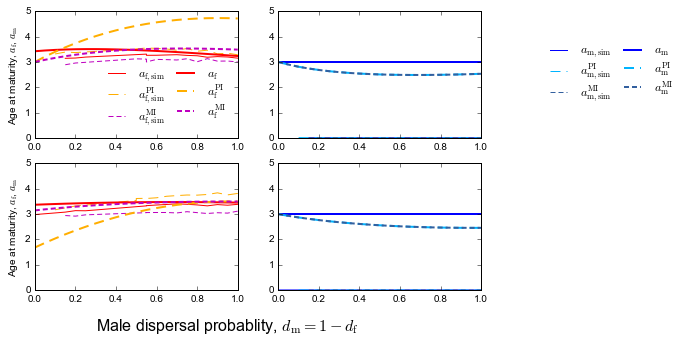

In [136]:

# select diploid cases
the_data_diploid = the_data[(the_data['system'] == 'diploid') 
                            & (the_data['nmp'] == 1)
                           & (the_data['nfp'] == 4)].sort('dm')
the_data_haplodiploid = the_data[(the_data['system'] == 'haplodiploid') 
                            & (the_data['nmp'] == 1)
                           & (the_data['nfp'] == 4)].sort('dm')

off_dip=the_data_diploid[the_data_diploid['imprint']=='offspring']
mi_dip=the_data_diploid[the_data_diploid['imprint']=='madumnal']
pi_dip=the_data_diploid[the_data_diploid['imprint']=='padumnal']

# haploid data
off_hap=the_data_haplodiploid[the_data_haplodiploid['imprint']=='offspring']
mi_hap=the_data_haplodiploid[the_data_haplodiploid['imprint']=='madumnal']
pi_hap=the_data_haplodiploid[the_data_haplodiploid['imprint']=='padumnal']

off_dip_numer=transpose([ ans(
            dms=dmi,nms=1,nfs=4,dfs=0.5,grad_af=dwdaf_diploid,grad_am=dwdam_diploid
        ) for dmi in dmvals ])
off_dip_numerMI=transpose([ ans(
            dms=dmi,nms=1,nfs=4,dfs=0.5,grad_af=dwdafMI_diploid,grad_am=dwdamMI_diploid
        ) for dmi in dmvals ])
off_dip_numerPI=transpose([ ans(
            dms=dmi,nms=1,nfs=4,dfs=0.5,grad_af=dwdafPI_diploid,grad_am=dwdamMI_diploid
        ) for dmi in dmvals ])


off_hap_numer=transpose([ ans(
            dms=dmi,nms=1,nfs=4,dfs=0.5,grad_af=dwdaf_haplodiploid,grad_am=dwdam_haplodiploid
        ) for dmi in dmvals ])
off_hap_numerMI=transpose([ ans(
            dms=dmi,nms=1,nfs=4,dfs=0.5,grad_af=dwdafMI_haplodiploid,grad_am=dwdamMI_haplodiploid
        ) for dmi in dmvals ])
off_hap_numerPI=transpose([ ans(
            dms=dmi,nms=1,nfs=4,dfs=0.5,grad_af=dwdafPI_haplodiploid,grad_am=dwdamMI_haplodiploid
        ) for dmi in dmvals ])

plt.figure(figsize=(8,5))

# first subplot showing diploid values of af
ax1 = plt.subplot(2,2,1)

ax1.plot(off_dip['dm'],off_dip['meanaf'],'r')
ax1.plot(pi_dip['dm'],pi_dip['meanaf'],'#ffae00',linestyle=(0,(10,6)))
ax1.plot(mi_dip['dm'],mi_dip['meanaf'],'m',linestyle=(0,(5,3)))
ax1.plot(dmvals,off_dip_numer[0],'r',linewidth=2.0)
ax1.plot(dmvals,off_dip_numerPI[0],'#ffae00',linestyle=(0,(10,6)),linewidth=2.0)
ax1.plot(dmvals,off_dip_numerMI[0],'m',linestyle=(0,(5,3)),linewidth=2.0)
ax1.set_ylim((0,5))
ax1.set_ylabel(r'Age at maturity, $a_{\mathrm{f}}$, $a_{\mathrm{m}}$')
ax1.legend((r'$a_{\mathrm{f,sim}}$',
            r'$a_{\mathrm{f,sim}}^{\mathrm{PI}}$',
           r'$a_{\mathrm{f,sim}}^{\mathrm{MI}}$',
            r'$a_{\mathrm{f}}$',
            r'$a_{\mathrm{f}}^{\mathrm{PI}}$',
            r'$a_{\mathrm{f}}^{\mathrm{MI}}$'),
           loc=4,frameon=False,ncol=2,columnspacing=.7,labelspacing=0.1)

# second subplot showing diploid values of am
ax2 = plt.subplot(2,2,2)


ax2.plot(off_dip['dm'],off_dip['meanam'],'b')
ax2.plot(pi_dip['dm'],pi_dip['meanam'],'#00b4ff',linestyle=(0,(10,6)))
ax2.plot(mi_dip['dm'],mi_dip['meanam'],'#33609f',linestyle=(0,(5,3)))

# numerical results
ax2.plot(dmvals,off_dip_numer[1],'b',linewidth=2.0)
ax2.plot(dmvals,off_dip_numerPI[1],'#00b4ff',linestyle=(0,(10,6)),linewidth=2.0)
ax2.plot(dmvals,off_dip_numerMI[1],'#33609f',linestyle=(0,(5,3)),linewidth=2.0)
ax2.set_ylim((0,5))
lgd=ax2.legend((r'$a_{\mathrm{m,sim}}$',
           r'$a_{\mathrm{m,sim}}^{\mathrm{PI}}$',
            r'$a_{\mathrm{m,sim}}^{\mathrm{MI}}$',
            r'$a_{\mathrm{m}}$',
            r'$a_{\mathrm{m}}^{\mathrm{PI}}$',
            r'$a_{\mathrm{m}}^{\mathrm{MI}}$'),
           loc=5,
           frameon=False,
           ncol=2,
           bbox_to_anchor=(2.0, 0.5),
           columnspacing=.7,
           labelspacing=0.1)

# 3rd subplot showing diploid values of am
ax3 = plt.subplot(2,2,3)


ax3.plot(off_hap['dm'],off_hap['meanaf'],'r')
ax3.plot(pi_hap['dm'],pi_hap['meanaf'],'#ffae00',linestyle=(0,(10,6)))
ax3.plot(mi_hap['dm'],mi_hap['meanaf'],'m',linestyle=(0,(5,3)))
ax3.plot(dmvals,off_hap_numer[0],'r',linewidth=2.0)
ax3.plot(dmvals,off_hap_numerPI[0],'#ffae00',linestyle=(0,(10,6)),linewidth=2.0)
ax3.plot(dmvals,off_hap_numerMI[0],'m',linestyle=(0,(5,3)),linewidth=2.0)
ax3.set_ylim((0,5))
ax3.set_ylabel(r'Age at maturity, $a_{\mathrm{f}}$, $a_{\mathrm{m}}$')
#plt.legend((r'$a_{\mathrm{f,sim}}$',
#            r'$a_{\mathrm{f,sim}}^{\mathrm{PI}}$',
#           r'$a_{\mathrm{f,sim}}^{\mathrm{MI}}$',
#            r'$a_{\mathrm{f}}$',
#            r'$a_{\mathrm{f}}^{\mathrm{PI}}$',
#            r'$a_{\mathrm{f}}^{\mathrm{MI}}$'),
#           loc=4,frameon=False,ncol=2,columnspacing=.7,labelspacing=0.1)

# 4th subplot showing diploid values of am
ax4 = plt.subplot(2,2,4)

ax4.plot(off_hap['dm'],off_hap['meanam'],'b')
ax4.plot(pi_hap['dm'],pi_hap['meanam'],'#00b4ff',linestyle=(0,(10,6)))
ax4.plot(mi_hap['dm'],mi_hap['meanam'],'#33609f',linestyle=(0,(5,3)))

# numerical results
ax4.plot(dmvals,off_hap_numer[1],'b',linewidth=2.0)
ax4.plot(dmvals,off_hap_numerPI[1],'#00b4ff',linestyle=(0,(10,6)),linewidth=2.0)
ax4.plot(dmvals,off_hap_numerMI[1],'#33609f',linestyle=(0,(5,3)),linewidth=2.0)
ax4.set_ylim((0,5))


xtxt = plt.text(-0.8,-1.6,r'Male dispersal probablity, $d_{\mathrm{m}} = 1-d_{\mathrm{f}}$',fontdict=fontdict)
plt.savefig("figs/diploid_sims_vs_numeric_nf4_nm1",format="pdf", bbox_extra_artists=(lgd,xtxt), bbox_inches='tight')
plt.show()

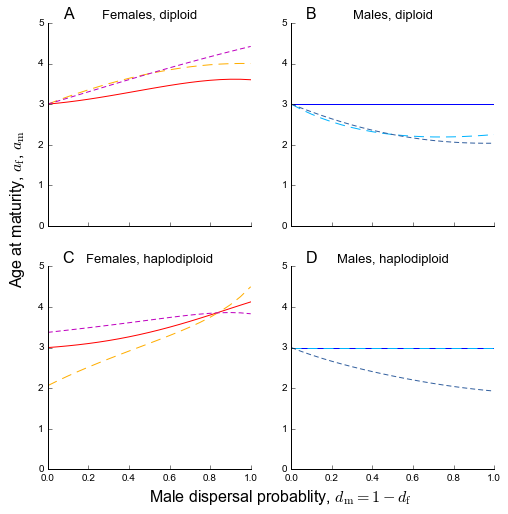

In [85]:
plt.figure(figsize=(8,8))
ylim_fem=(0,5)
ylim_men=(0,4)
xticks=[0,0.2,0.4,0.6,0.8,1.0]
ax1 = None
ax1 = plt.subplot(2,2,1)
ax1.set_ylim(ylim_fem)
ax1.set_yticks(list(np.arange(0,ylim_fem[1]+1,1)))
ax1.set_xticks(xticks)
ax1.plot(dmvals, yvals[0],'r')
ax1.plot(dmvals, yvalsPI[0],'#ffae00',linestyle=(0,(10,6)))#,linestyle=(0,10,6))
ax1.plot(dmvals, yvalsMI[0],'m',linestyle=(0,(5,3)))#,linestyle=(0,10,6))
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.set_xticklabels([])
plt.text(.5,ylim_fem[1]+.1,r'Females, diploid',fontdict=fontdict_small,horizontalalignment='center')
# indicator label
plt.text(.1,ylim_fem[1]+.1,r'A',fontdict=fontdict,horizontalalignment='center')
    
ax2 = plt.subplot(2,2,2)
ax2.set_ylim(ylim_men)
ax2.set_yticks(list(np.arange(0,ylim_fem[1]+1,1)))
ax2.plot(dmvals, yvals[1],'b')
ax2.plot(dmvals, yvalsPI[1],'#00b4ff',linestyle=(0,(10,6)))
ax2.plot(dmvals, yvalsMI[1],'#33609f',linestyle=(0,(5,3)))#,linestyle=(0,10,6))
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')
ax2.set_xticklabels([])
plt.text(.5,ylim_fem[1]+.1,r'Males, diploid',fontdict=fontdict_small,horizontalalignment='center')
# indicator label
plt.text(.1,ylim_fem[1]+.1,r'B',fontdict=fontdict,horizontalalignment='center')

ax3 = plt.subplot(2,2,3)
ax3.set_ylim(ylim_fem)
ax3.set_yticks(list(np.arange(0,ylim_fem[1]+1,1)))
ax3.plot(dmvals, yvals_haplo[0],'r')
ax3.plot(dmvals, yvalsPI_haplo[0],'#ffae00',linestyle=(0,(10,6)))#,linestyle=(0,10,6))
ax3.plot(dmvals, yvalsMI_haplo[0],'m',linestyle=(0,(5,3)))#,linestyle=(0,10,6))
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.yaxis.set_ticks_position('left')
ax3.xaxis.set_ticks_position('bottom')
plt.text(-.2,8,r'Age at maturity, $a_{\mathrm{f}}$, $a_{\mathrm{m}}$',fontdict=fontdict,rotation=90)
plt.text(.5,ylim_fem[1]+.1,r'Females, haplodiploid',fontdict=fontdict_small,horizontalalignment='center')
# indicator label
plt.text(.1,ylim_fem[1]+.1,r'C',fontdict=fontdict,horizontalalignment='center')



ax4 = plt.subplot(2,2,4)
ax4.set_ylim(ylim_men)
ax4.plot(dmvals, yvals_haplo[1],'b')
ax4.set_yticks(list(np.arange(0,ylim_fem[1]+1,1)))
ax4.plot(dmvals, yvalsPI_haplo[1],'#00b4ff',linestyle=(0,(10,6)))
ax4.plot(dmvals, yvalsMI_haplo[1],'#33609f',linestyle=(0,(5,3)))#,linestyle=(0,10,6))
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.yaxis.set_ticks_position('left')
ax4.xaxis.set_ticks_position('bottom')
plt.text(.5,ylim_fem[1]+.1,r'Males, haplodiploid',fontdict=fontdict_small,horizontalalignment='center')
# indicator label
plt.text(.1,ylim_fem[1]+.1,r'D',fontdict=fontdict,horizontalalignment='center')


# x-axis label

plt.text(-0.7,-.8,r'Male dispersal probablity, $d_{\mathrm{m}} = 1-d_{\mathrm{f}}$',fontdict=fontdict)
plt.savefig("para",format="pdf")
plt.show()

In [ ]:
the_data_diploid.describe()